## Watershed Algorithm
* watershed is transformation defined on grayscale image
* treats image as topographic map, where height is represented by brightness of each point
* extracts sure background and foreground, then runs watershed to detect exact boundaries
* algorithm helps in detecting touching and overlapping objects in image

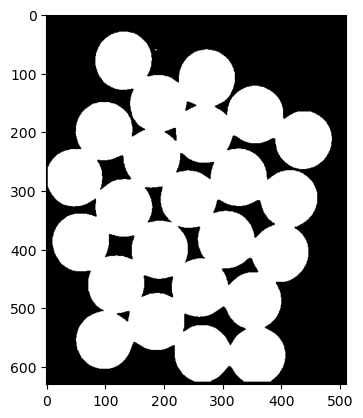

In [78]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('/Users/jihye/Projects/research/coin2.png') # loads image from file
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # sets color image to grayscale
# THRESH_BINARY_INV indicates that pixel values less than threshold are set to max 
# while values greater than threshold are set to 0 (white objects, black background)
# THRESH_OTSU uses otsu algorithm to choose optimal threshold value
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
plt.imshow(thresh, 'gray', vmin=0, vmax=255)
plt.show()

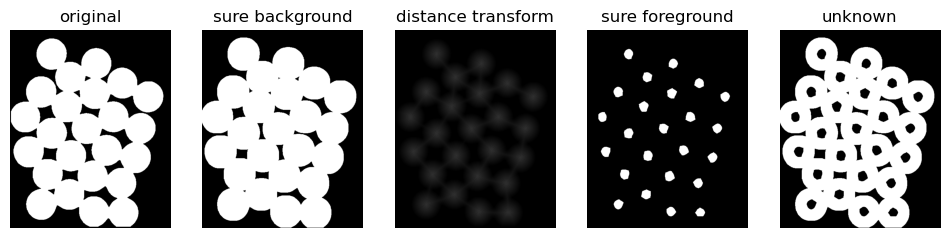

In [56]:
fig, ax = plt.subplots(1,5, figsize=[12,12])

# Noise removal
kernel = np.ones((3,3),np.uint8)
# morphologyEx w MORPH_OPEN is erosion followed by dilation; removes noise in background
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2) 
ax[0].imshow(opening, 'gray', vmin=0, vmax=255)
ax[0].set_title("original")
ax[0].axis('off')

# Finding background area using dilation
sure_bg = cv2.dilate(opening,kernel,iterations=3)
ax[1].imshow(sure_bg, 'gray', vmin=0, vmax=255)
ax[1].set_title("sure background")
ax[1].axis('off')

# Finding sure foreground area using distance transform
# distance transform: each pixel value represents distance from nearest non-zero pixel
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ax[2].imshow(dist_transform, 'gray', vmin=0, vmax=255)
ax[2].set_title("distance transform")
ax[2].axis('off')

ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
ax[3].imshow(sure_fg, 'gray', vmin=0, vmax=255)
ax[3].set_title("sure foreground")
ax[3].axis('off')

# Finding unknown region (neither lies in foreground or background; marker for watershed algorithm)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ax[4].imshow(unknown, 'gray', vmin=0, vmax=255)
ax[4].set_title("unknown")
ax[4].axis('off')

plt.show()


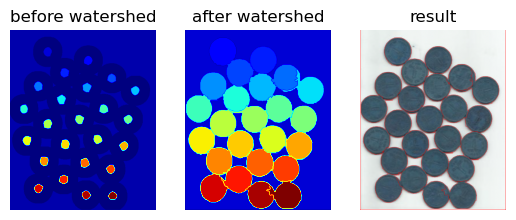

In [57]:
fig, ax = plt.subplots(1,3)

# Marker labelling; connectedComponenets computes connected components labeled image
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

# Dark blue area is unknown region; sure coins are colored; ligher blue area is sure background 
ax[0].imshow(markers, 'jet')
ax[0].set_title("before watershed")
ax[0].axis('off')

# Apply watershed
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

ax[1].imshow(markers, 'jet')
ax[1].set_title("after watershed")
ax[1].axis('off')

ax[2].imshow(img, 'jet')
ax[2].set_title("result")
ax[2].axis('off')

plt.show()

## Watershed algorithm on DICOM lung slice

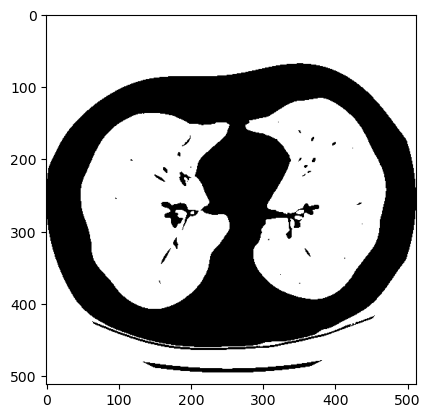

In [7]:
import numpy as np
import cv2
import pydicom
from skimage import exposure
from glob import glob
import os
from matplotlib import pyplot as plt
from PIL import Image

ds=pydicom.dcmread('/Users/jihye/Projects/research/01_practice_images/NLST/100002/01-02-1999-NA-NLST-LSS-55322/1.000000-0OPAGELSPLUSD3602.512080.00.11.5-35858/1-075.dcm')
dcm_sample = ds.pixel_array.astype(float)
dcm_sample = (np.maximum(dcm_sample, 0)/dcm_sample.max()) * 255
dcm_sample = np.uint8(dcm_sample)

final_image = Image.fromarray(dcm_sample)
final_image.save('/Users/jihye/Projects/research/01_practice_images/1-075.png')

img = cv2.imread('/Users/jihye/Projects/research/01_practice_images/1-075.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) 
plt.imshow(thresh, 'gray', vmin=0, vmax=255)
plt.show()


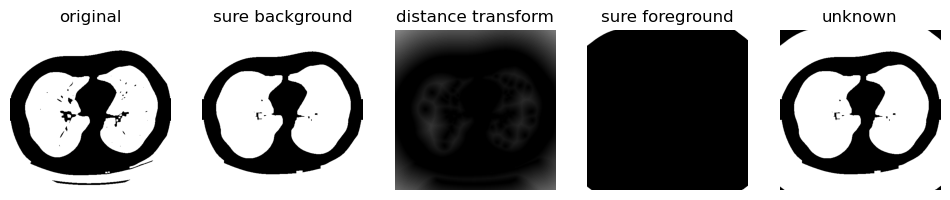

In [8]:
fig, ax = plt.subplots(1,5, figsize=[12,12])

# Noise removal
kernel = np.ones((3,3),np.uint8)
# morphologyEx w MORPH_OPEN is erosion followed by dilation; removes noise in background
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2) 
ax[0].imshow(opening, 'gray', vmin=0, vmax=255)
ax[0].set_title("original")
ax[0].axis('off')

# Finding background area using dilation
sure_bg = cv2.dilate(opening,kernel,iterations=3)
ax[1].imshow(sure_bg, 'gray', vmin=0, vmax=255)
ax[1].set_title("sure background")
ax[1].axis('off')

# Finding sure foreground area using distance transform
# distance transform: each pixel value represents distance from nearest non-zero pixel
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ax[2].imshow(dist_transform, 'gray', vmin=0, vmax=255)
ax[2].set_title("distance transform")
ax[2].axis('off')

ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
ax[3].imshow(sure_fg, 'gray', vmin=0, vmax=255)
ax[3].set_title("sure foreground")
ax[3].axis('off')

# Finding unknown region (neither lies in foreground or background; marker for watershed algorithm)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ax[4].imshow(unknown, 'gray', vmin=0, vmax=255)
ax[4].set_title("unknown")
ax[4].axis('off')

plt.show()


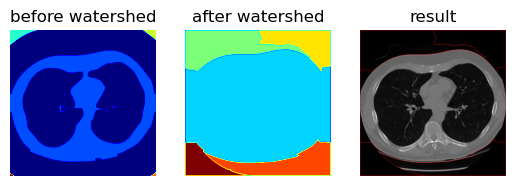

In [9]:
fig, ax = plt.subplots(1,3)

# Marker labelling; connectedComponenets computes connected components labeled image
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

# Dark blue area is unknown region; sure coins are colored; ligher blue area is sure background 
ax[0].imshow(markers, 'jet')
ax[0].set_title("before watershed")
ax[0].axis('off')

# Apply watershed
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

ax[1].imshow(markers, 'jet')
ax[1].set_title("after watershed")
ax[1].axis('off')

ax[2].imshow(img, 'jet')
ax[2].set_title("result")
ax[2].axis('off')

plt.show()

## Active Contour Model
* method to fit open/closed splines (piecewise polynomials) to lines/edges in image

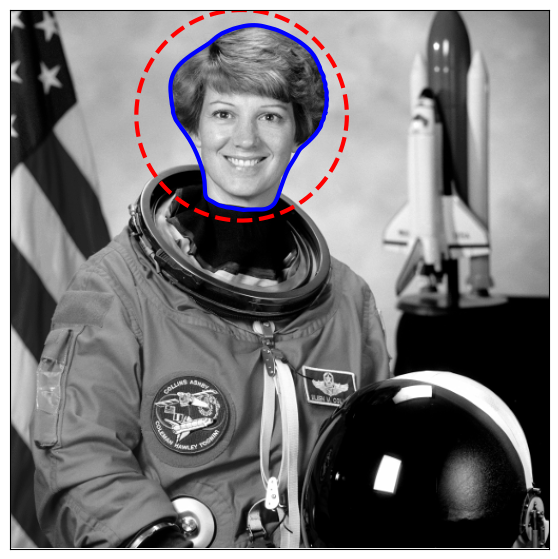

In [59]:
# active contour model to segment the face of person from rest of image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

img = data.astronaut()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400) # 400 evenly spaced numbers from 0 to 2pi
r = 100 + 100*np.sin(s)
c = 220 + 100*np.cos(s)
init = np.array([r, c]).T

# gaussian reduces noice and simplifies details; sigma=3 scalar st.d for guassian kernal
# active_contour(image, snake, alpha, beta, gamma); snake is initial snake coordiates
# alpha is snake length shape parameters; higher value = faster snake contraction
# beta is snake smoothness shape parameter; gamma is explicit time stepping parameter
snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

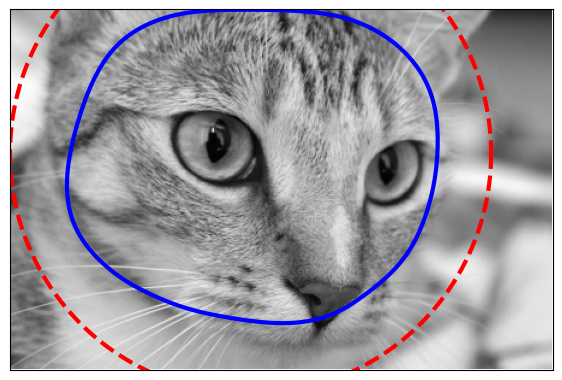

In [64]:
# active contour model to segment the face of cat
img = data.cat()
img = rgb2gray(img)

s = np.linspace(0, 2*np.pi, 400)
r = 120 + 200*np.sin(s)
c = 200 + 200*np.cos(s)
init = np.array([r, c]).T

snake = active_contour(gaussian(img, 3, preserve_range=False),
                       init, alpha=0.015, beta=10, gamma=0.001)

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()

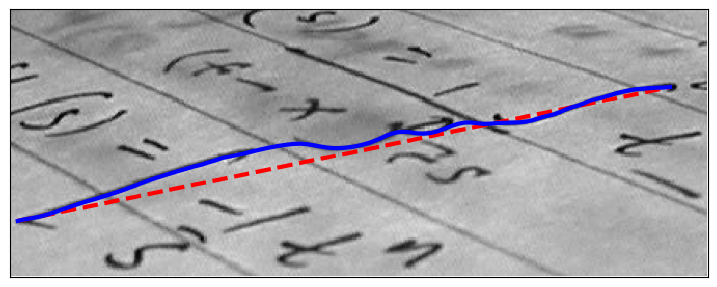

In [67]:
# active contour model to find darkest curve between 2 fixed points 
# while obeying smootheness considerations
img = data.text()

r = np.linspace(136, 50, 100)
c = np.linspace(5, 424, 100)
init = np.array([r, c]).T

# w_line controls attraction to brightness, neg values attract dark regions 
# w_edge controls attraction to edges, neg values repel snake from edges
# boundary_condition- 'fixed': holds end points in place
snake = active_contour(gaussian(img, 1, preserve_range=False),
                       init, boundary_condition='fixed',
                       alpha=0.1, beta=1.0, w_line=-5, w_edge=0, gamma=0.1)

fig, ax = plt.subplots(figsize=(9, 5))
ax.imshow(img, cmap=plt.cm.gray)
ax.plot(init[:, 1], init[:, 0], '--r', lw=3)
ax.plot(snake[:, 1], snake[:, 0], '-b', lw=3)
ax.set_xticks([]), ax.set_yticks([])
ax.axis([0, img.shape[1], img.shape[0], 0])

plt.show()